In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
df = pd.read_csv(r"D:\bank-additional.csv", delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)

df.head()
df.tail()
df.shape
df.columns

df.dtypes.value_counts()  # Corrected line
df.info()
df.duplicated().sum()
df.isna().sum()
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

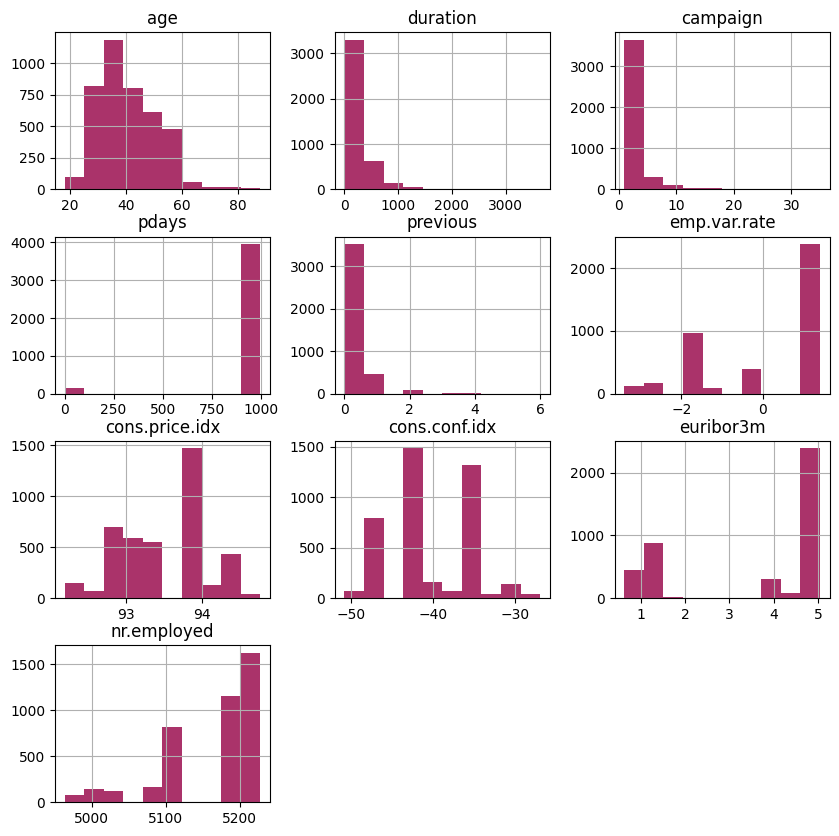

In [4]:
df.describe()
df.describe(include='object')
df.hist(figsize=(10,10),color='#AA336A')  # Changed to dark pink color
plt.show()

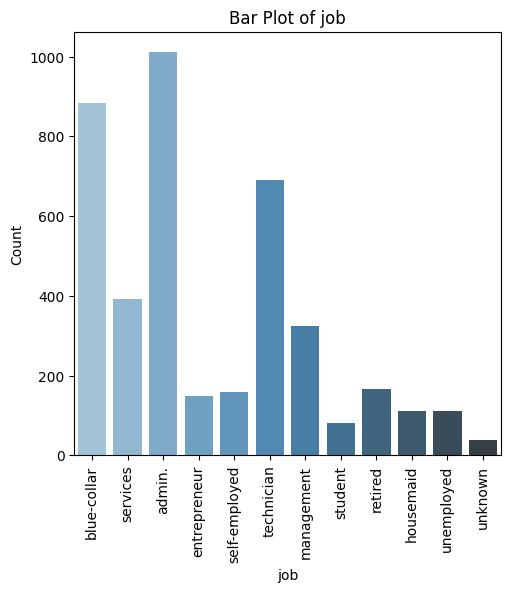

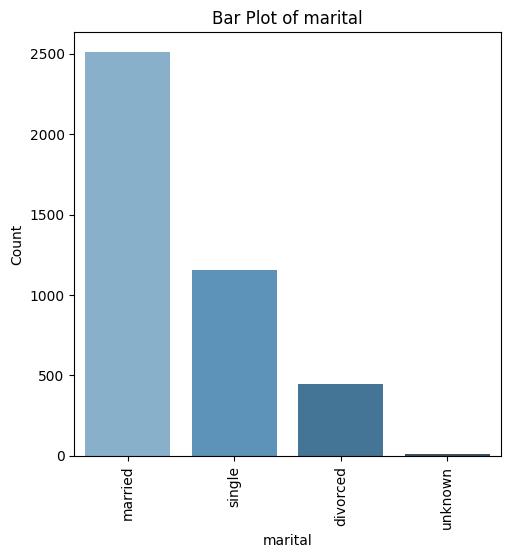

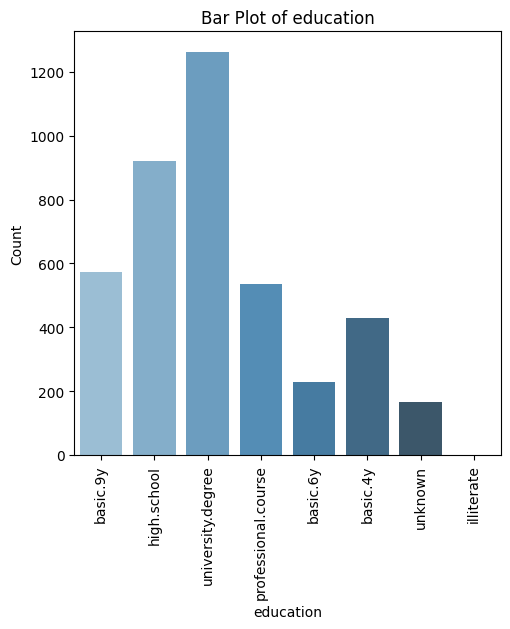

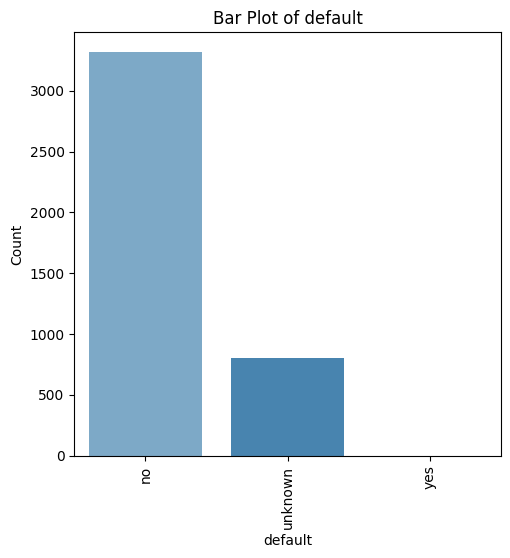

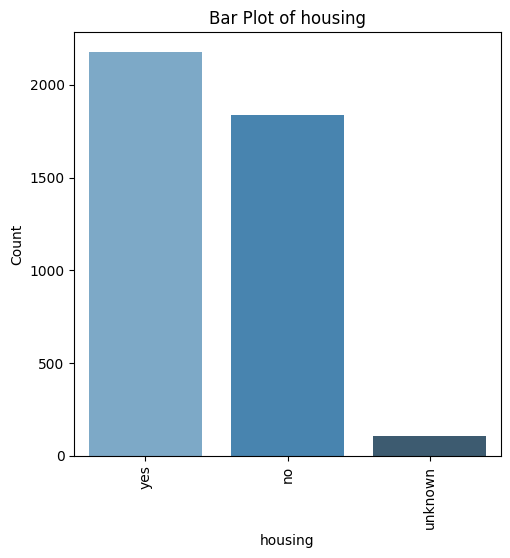

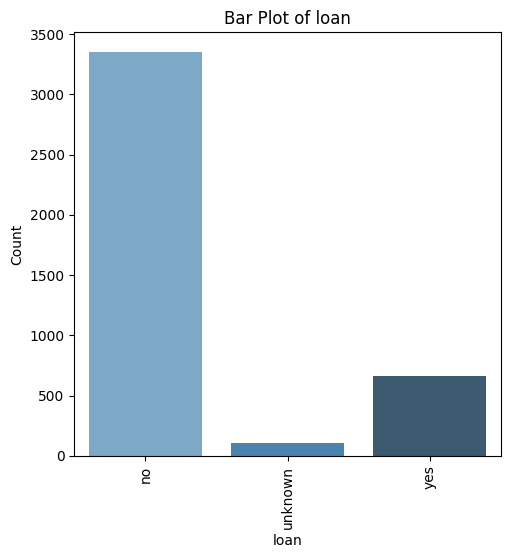

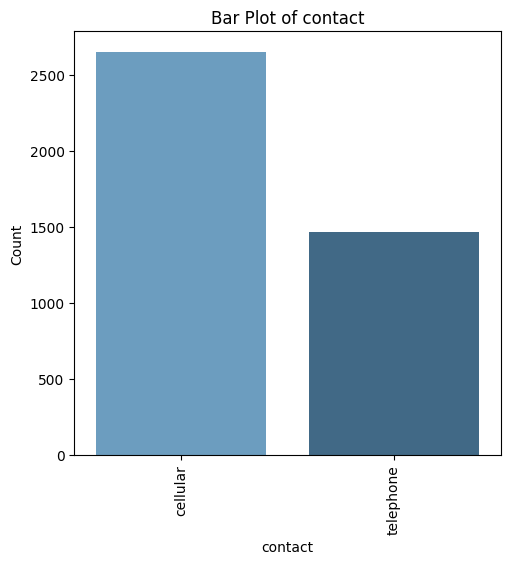

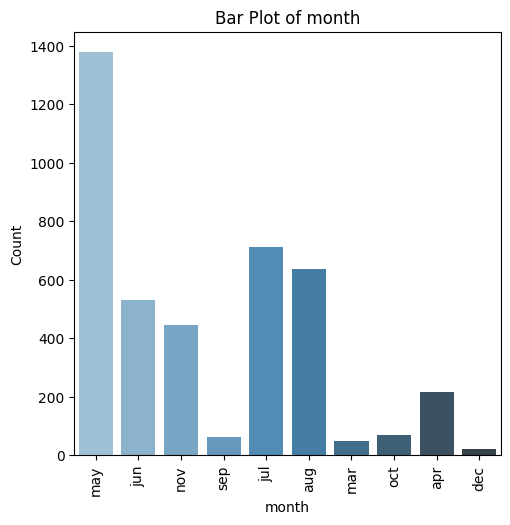

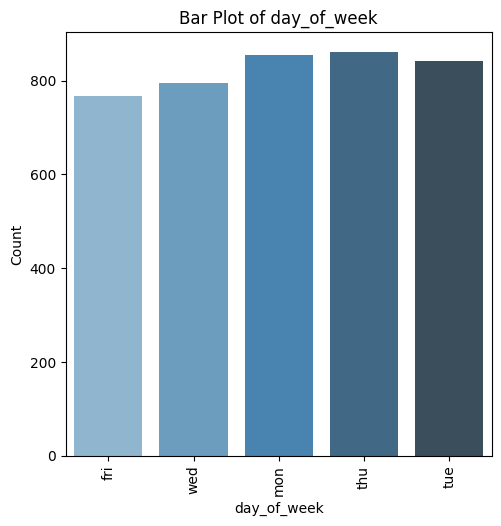

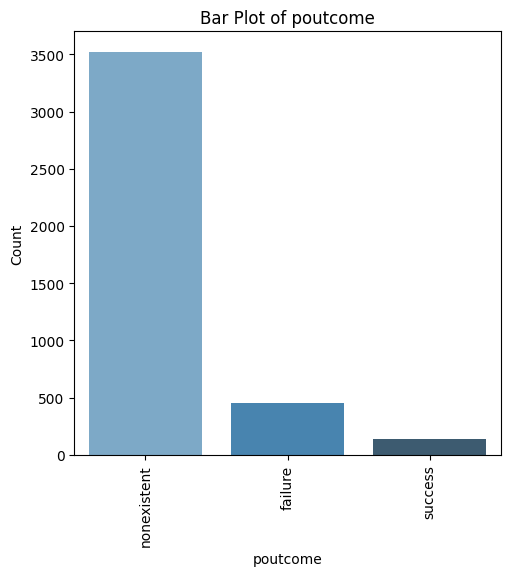

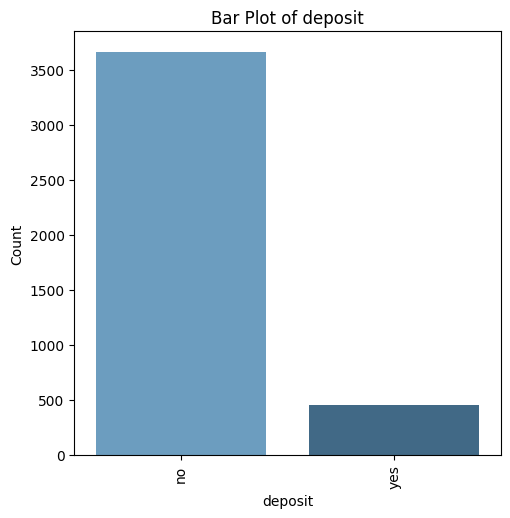

In [9]:
for feature in cat_cols:
    plt.figure(figsize=(5.5,5.5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=df, palette='Blues_d')  # Changed to Blues_d palette
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

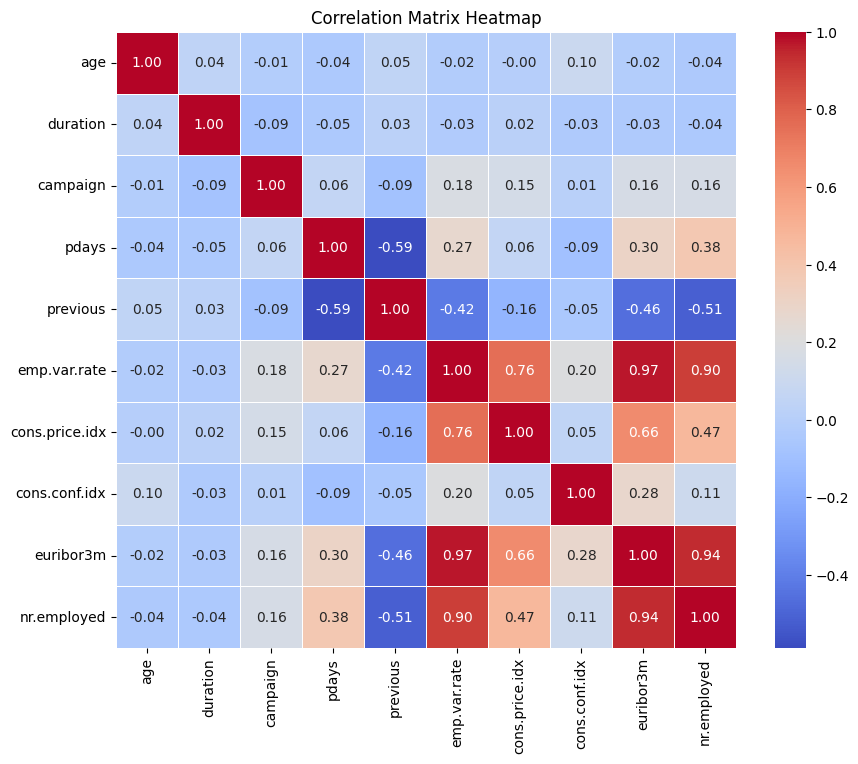

In [13]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1 = df.copy()
df1.columns
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns
df1.shape

(4119, 18)

In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded
df_encoded['deposit'].value_counts()
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)
mscore(dt)
ypred_dt = dt.predict(x_test)
print(ypred_dt)
eval_model(y_test,ypred_dt)

Training Score 0.923276141146002
Testing Score 0.9116504854368932
[0 0 1 ... 0 0 0]
Accuracy_Score 0.9116504854368932
Confusion Matrix
 [[913  17]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.60      0.26      0.36       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


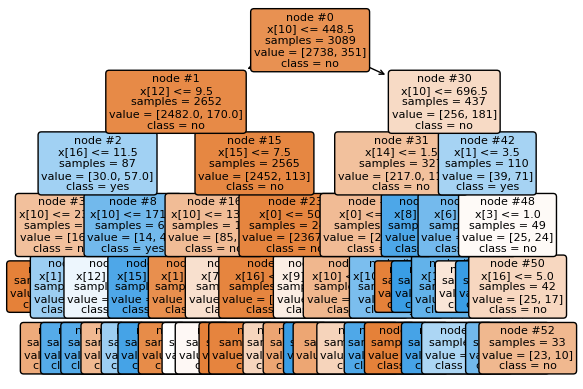

In [26]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)
plot_tree(dt,class_names=cn,filled=True,impurity=False,fontsize=8,node_ids=True,rounded=True)
plt.show()



Training Score 0.9145354483651668
Testing Score 0.916504854368932
Accuracy_Score 0.916504854368932
Confusion Matrix
 [[912  18]
 [ 68  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.64      0.32      0.43       100

    accuracy                           0.92      1030
   macro avg       0.79      0.65      0.69      1030
weighted avg       0.90      0.92      0.90      1030



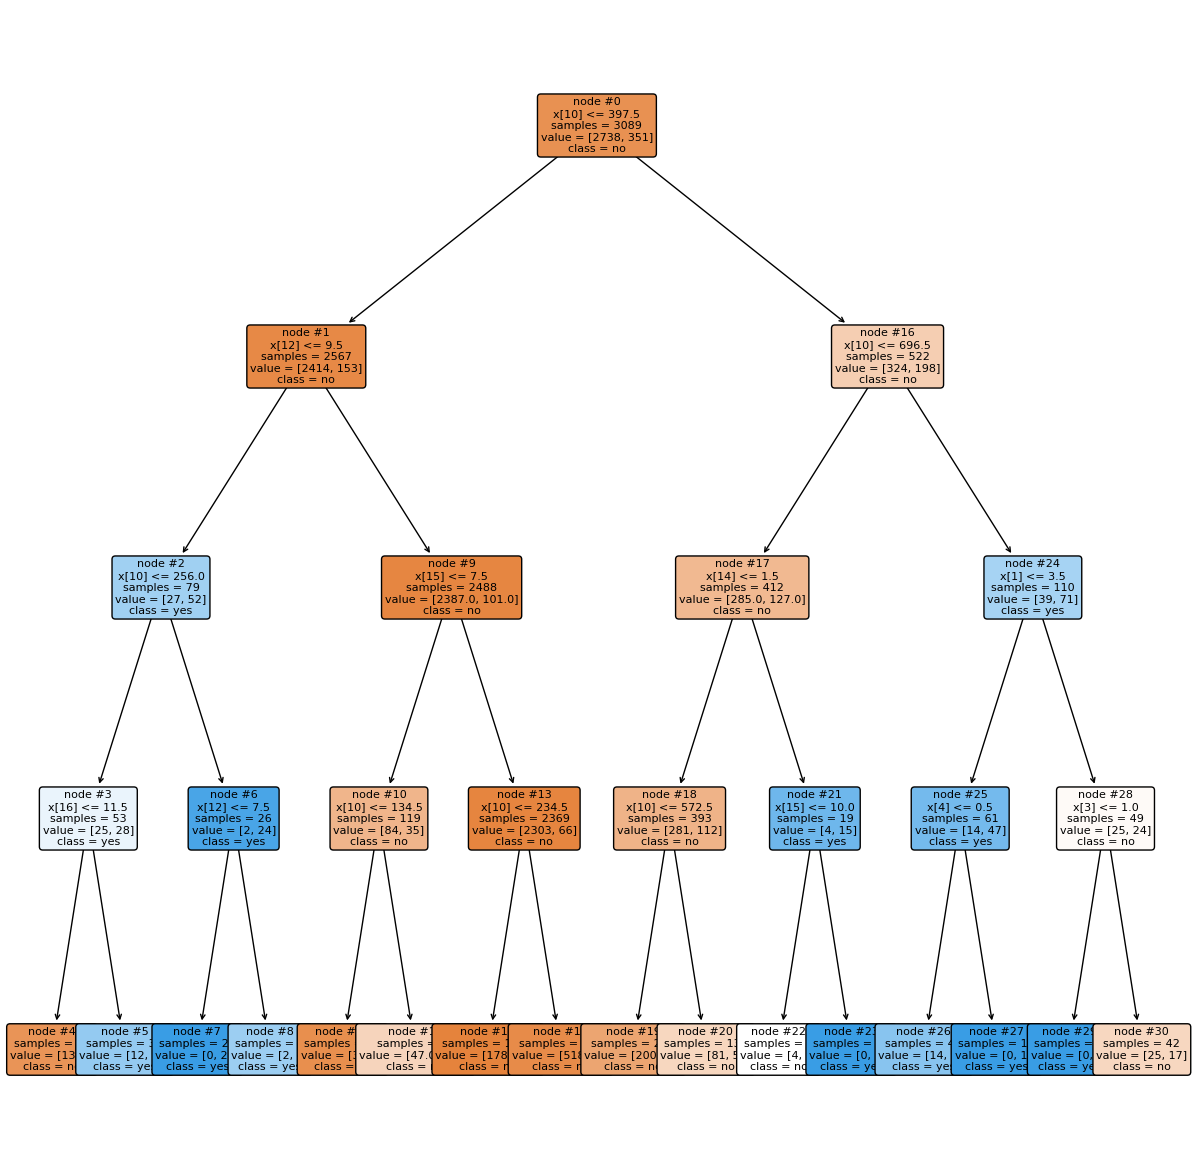

In [28]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)
mscore(dt1)
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True,impurity=False,fontsize=8,node_ids=True,rounded=True)
plt.show()

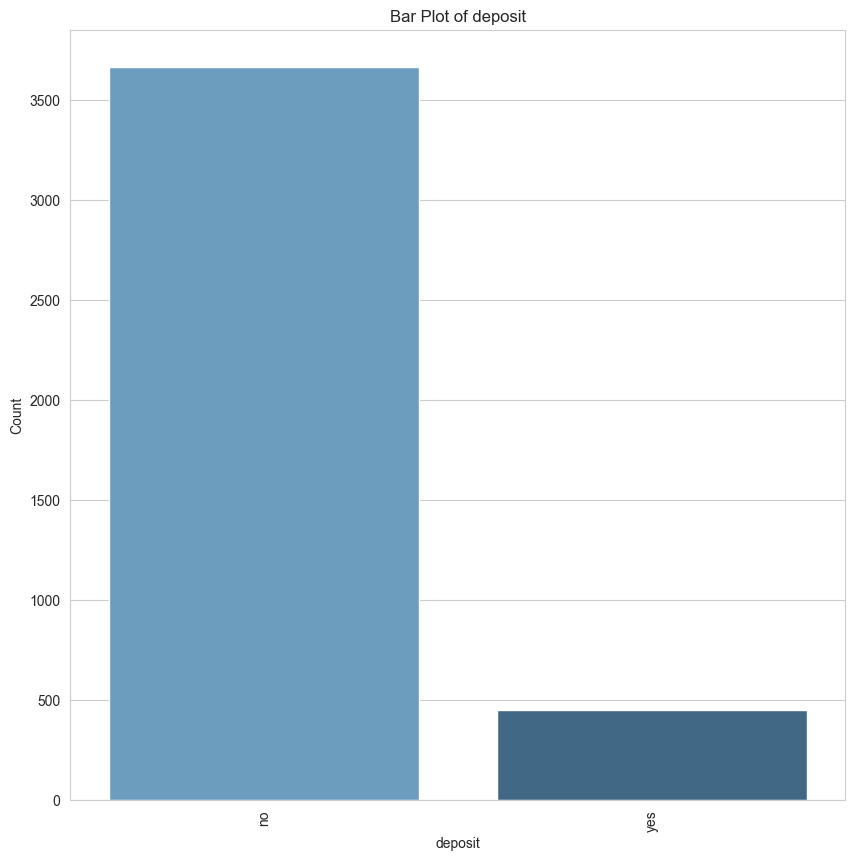

In [30]:
# Modified code to change color
sns.set_style("whitegrid")
sns.set_palette("Blues_d")  # Changed to Blues_d palette
plt.figure(figsize=(10,10))
sns.countplot(x='deposit', data=df, palette="Blues_d")  # Changed to Blues_d palette
plt.title('Bar Plot of deposit')
plt.xlabel('deposit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

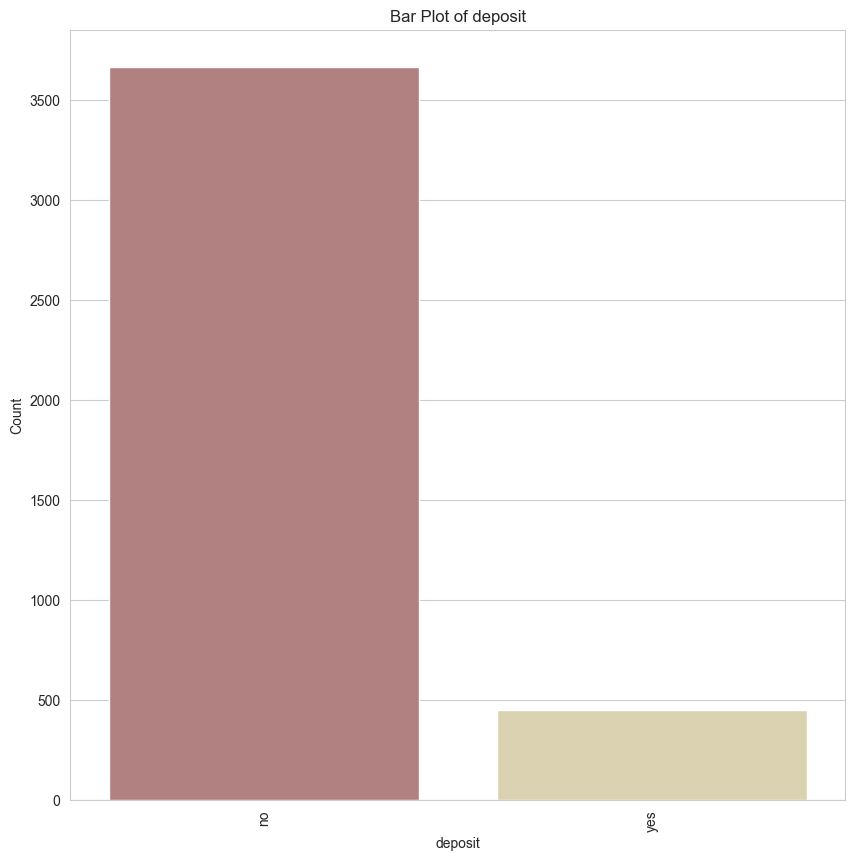

In [31]:
sns.set_palette("pink")  # Changed to pink palette
plt.figure(figsize=(10,10))
sns.countplot(x='deposit', data=df, palette="pink") # Changed to pink palette
plt.title('Bar Plot of deposit')
plt.xlabel('deposit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()